# 第十章 模块和包

## 10.1　导学

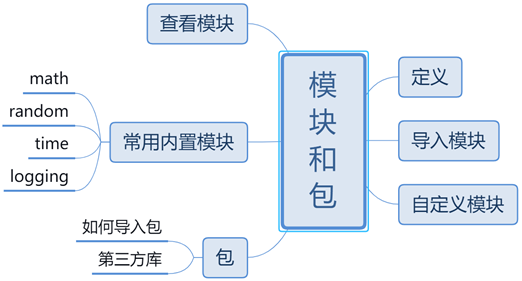

学习目标：
1.	掌握如何导入模块
2.	掌握如何自定义模板
3.	熟悉查看模块的方法
4.	了解常见内置模块的作用和使用方法
5.	了解如何导包
6.	了解如何安装第三方库


## 10.2 模块的定义

模块就是Python程序。换句话说，任何Python程序都可以作为模块。

模块可以提高代码的可维护性和可重用性。

本节所介绍的模块，可以理解为是对代码更高级的封装，即把能够实现某一特定功能的代码编写在同一个.py文件中，并将其作为一个独立的模块，这样既可以方便其他程序或脚本导入并使用，同时还能有效避免函数名和变量名发生冲突。  
举个简单的例子，在某一目录下（桌面也可以）创建一个名为hello.py文件，其包含的代码如下：

In [ ]:
def say ():
    print("Hello,World!")

在同一目录下，再创建一个say.py文件，其包含的代码如下：

In [ ]:
#通过 import 关键字，将 hello.py 模块引入此文件
import hello
hello.say()

运行say.py文件，其输出结果为：

In [ ]:
Hello,World!

## 10.3 导入模块

import两种主要方式：

In [ ]:
import 模块名1[as别名1],模块名2[as别名2]，…  
from 模块名 import 成员名1[as别名1]，成员名2[as别名2]，…

1）import模块名1[as别名1],模块名2[as别名2]，…：  
会导入指定模块中的所有成员（包括变量、函数、类等）。  
当需要使用模块中的成员时，需用该模块名（或别名）作为前缀，否则Python解释器会报错。 

2）from模块名import成员名1[as别名1]，成员名2[as别名2]，…：  
只会导入模块中指定的成员，而不是全部成员。  
程序中使用该成员时，无需附加任何前缀，直接使用成员名（或别名）即可。 

### 10.3.1 import 模块名

最简单的导入模块方法就是直接使用import 模块名的这种方式。下面来看一个模块文件名为module.py

In [ ]:
def add(x, y):
    return x + y

def substract(x, y):
    return x - y

def __multiple(x, y):
    return x * y

另一个文件为test.py

In [ ]:
import module

print(module.add(1, 5))
print(module.multiple(4, 5))

运行该测试文件，结果如下：

In [ ]:
6
20

这种导入模块的方式需要注意两点：  
第一是导入模块的语句必须在使用模块内方法之前。  
第二就是每个需要导入的方法前面必须加上“模块名.”。

### 10.3.2 import 模块名 as 别名

可以为导入的模块名起一个别名，这种做法的意义在于，可能本模块中的某个对象名称和模块名有冲突，通过别名来避免这个问题。下面修改test.py，代码如下：

In [ ]:
import module as m

print(m.add(1, 5))
print(m.multiple(4, 5))

导入多个模块的同时，也可以为模块指定别名

In [ ]:
import module as m,os as o
#使用模块别名作为前缀来访问模块中的成员
print(m.add(1, 5))
print(o.sep)

###  10.3.3 from 模块名 import *

还可以一次导入模块中的所有方法，这样就不用在调用模块方法中使用前缀了。

In [ ]:
from module import *

print(add(1, 5))
print(multiple(4, 5))

### 10.3.3 from 模块名 import 成员名 as 别名

In [2]:
from module import add as addTwoNumber

print(addTwoNumber(3, 5)) 


8


但请注意，此时还使用add将出现如下错误：

In [ ]:
NameError: name 'add' is not defined

那么为什么需要别名呢，因为一般来说，程序中很可能需要同时导入多个包。不可避免的存在多个包中的名称重复问题。比如同时导入module1和module2内的所有成员，假如这两个模块内都有一个add()函数，那么当在程序中执行如下代码时：

In [ ]:
add()

上面调用的这个foo()函数到底是module1模块中的还是module2模块中的？因此，这种导入指定模块内所有成员的用法是有风险的。但如果换成如下的方式：

In [ ]:
#导入module1 中的add成员，并指定其别名为add1
from module1 import add as add1
#导入module2 中的add成员，并指定其别名为add2
from module2 import add as add2

## 10.4 自定义模块

### 10.4.1 定义模块

In [ ]:
#person.py
name = "Tom"
age = 23
print(name, age)

def say():
    print('name:', name, ", age:", age)

class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def say(self):
        print('name:', self.name, ", age:", self.age)
#测试代码
say()
person = Person("Tom",23)
person.say()

新建一个test.py文件，并在该文件中使用person.py模板文件，即使用import语句导入person.py：

In [ ]:
import person

注意，虽然person模板文件的全称为person.py，但在使用import语句导入时，只需要使用该模板文件的名称即可。此时，如果直接运行test.py文件，其执行结果为：

In [ ]:
Tom 23
name: Tom , age: 23
name: Tom , age: 23

可以看到，当执行test.py文件时，它同样会执行person.py中测试代码，这显然不是想要的效果。  
正常的效果应该是，测试代码不应该被执行。    
要避免测试代码被自动执行，可以借助Python内置的 \_\_name\_\_变量。在person.py增加判断，只有当\_\_name\_\_=='\_\_main\_\_'时才执行测试代码。  
因此，可以修改person.py模块文件中的测试代码为：

In [ ]:
if __name__ == '__main__':
    say()
    person = Person("Tom",23)
    person.say()

在定义函数或者类时，可以为其添加说明文档，以方便用户清楚的知道该函数或者类的功能。自定义模块也不例外。为自定义模块添加说明文档，和函数或类的添加方法相同，即只需在模块开头的位置定义一个字符串即可。例如，为person.py文件添加一个说明文档：

In [ ]:
"""
person模块中包含以下内容：
name 字符串变量：初始值为"Tom"
age  整型变量：初始值为23
say() 函数
Person类：包含 name 和 age属性和 say() 方法。
"""

在此基础上，可以通过模块的\_\_doc\_\_属性，来访问模块的说明文档。例如，在test.py文件中添加如下代码：

In [ ]:
import person
print(person.__doc__)

程序运行结果为：

In [ ]:
Tom 23
name: Tom , age: 23
name: Tom , age: 23

person模块中包含以下内容：
name 字符串变量：初始值为"Tom"
age  整型变量：初始值为23
say() 函数
Person类：包含 name 和 age属性和 say() 方法。

### 10.4.2 导入自定义模块

很多初学者经常遇到这样的问题，即自定义Python模板后，在其他文件中用import（或from...import）语句引入该文件时，Python解释器同时如下错误：

In [ ]:
ModuleNotFoundError: No module named '模块名'

此处错误的意思是Python找不到这个模块名，那么Python如何进行模块的查找？Python解释器查找模块文件的过程:

按照以下顺序查找指定的模块文件：   
①	在当前目录，即当前执行的程序文件所在目录下查找；    
②	到PYTHONPATH（环境变量）下的每个目录中查找；    
③	到Python默认的安装目录下查找。

##### 临时添加模块完整路径

模块文件的存储位置，可以临时添加到sys.path变量中，即向sys.path中添加需要运行文件的所在目录，比如添加如下代码：

In [ ]:
import sys
sys.path.append('D:\\python')

print(sys.path)

注意：在添加完整路径中，路径中的'\'需要使用\进行转义，否则会导致语法错误。运行上面的代码，则输出sys.path变量的值如下：

In [ ]:
['D:\\PythonCode\\PSLectures\\2020', 'D:\\PythonCode\\PSLectures', 'C:\\Program Files\\JetBrains\\PyCharm 2019.3.3\\plugins\\python\\helpers\\pycharm_display', 'C:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip', 'C:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python39\\DLLs', 'C:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python39\\lib', 'C:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python39', 'C:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages', 'C:\\Program Files\\JetBrains\\PyCharm 2019.3.3\\plugins\\python\\helpers\\pycharm_matplotlib_backend', 'D:\\python']

该输出信息中，最后一个就是临时添加进去的存储路径。需要注意的是，通过该方法添加的目录，只能在执行当前文件的窗口中有效，窗口关闭后即失效。

##### 将模块保存到指定位置

可以直接将已编写好的文件添加到lib\site-packages路径下，就相当于为Python扩展了一个新模块，这样任何Python程序都可使用该模块。

##### 设置环境变量

PYTHONPATH环境变量（简称path变量）的值是很多路径组成的集合，Python解释器会按照path包含的路径进行一次搜索，直到找到指定要加载的模块。当然，如果最终依旧没有找到，则Python就报ModuleNotFoundError异常。

### 3. 模块访问控制

当向文件导入某个模块时，导入的是该模块中那些名称不以下划线（单下划线“\_”或者双下划线“\_\_”）开头的变量、函数和类。因此，如果不想模块文件中的某个成员被引入到其他文件中使用，可以在其名称前添加下划线。

In [ ]:
def add(x, y):
    return x + y

def substract(x, y):
    return x - y

def __multiple(x, y):
    return x * y

Test.py文件的代码

In [ ]:
from module import *
print(add(1, 5))

执行test.py文件，输出结果为：

In [ ]:
NameError: name 'multiple' is not defined
6

还可以借助模块提供的\_\_all\_\_变量，该变量的值是一个列表，存储的是当前模块中一些成员（变量、函数或者类）的名称。

下面修改module.py模块文件中的代码如下：

In [ ]:
def add(x, y):
    return x + y

def substract(x, y):
    return x - y

def multiple(x, y):
    return x * y

__all__ = ['add', 'substract']

重新执行test.py文件，其执行结果为：

In [ ]:
6
NameError: name 'multiple' is not defined

虽然module.py文件中已经将multiple()函数改为公开使用函数,但是由于在\_\_all\_\_变量中未包括该函数，所以其它模块使用“from模块名import*”的方式引入时，并不会导入该函数，所以出现了上面的错误信息。

### 10.5 查看模块

### 1. dir()函数

通过dir()函数，可以查看某指定模块包含的全部成员，包括变量、函数和类等。这里以导入string模块为例，string模块包含操作字符串相关的大量方法，下面通过dir()函数查看该模块中包含哪些成员：

In [ ]:
import string
print(dir(string))

程序执行结果为：

In [ ]:
['Formatter', 'Template', '_ChainMap', '_TemplateMetaclass', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_re', '_string', 'ascii_letters', 'ascii_lowercase', 'ascii_uppercase', 'capwords', 'digits', 'hexdigits', 'octdigits', 'printable', 'punctuation', 'whitespace']

忽略显示dir()函数输出的特殊成员的方法。

In [ ]:
import string
print([e for e in dir(string) if not e.startswith('_')])

程序执行结果为：

In [ ]:
['Formatter', 'Template', 'ascii_letters', 'ascii_lowercase', 'ascii_uppercase', 'capwords', 'digits', 'hexdigits', 'octdigits', 'printable', 'punctuation', 'whitespace']

### 2.\_\_all\_\_属性

除了使用dir()函数之外，还可以使用\_\_all\_\_属性，借助该变量也可以查看模块（包）内包含的所有成员。仍以string模块为例，举个例子：

In [ ]:
import string
print(string.__all__)

程序执行结果为：

In [ ]:
['ascii_letters', 'ascii_lowercase', 'ascii_uppercase', 'capwords', 'digits', 'hexdigits', 'octdigits', 'printable', 'punctuation', 'whitespace', 'Formatter', 'Template']

显然，和dir()函数相比，\_\_all\_\_属性在查看指定模块成员时，它不会显示模块中的特殊成员，同时还会根据成员的名称进行排序显示。不过需要注意的是，并非所有的模块都支持使用\_\_all\_\_属性，因此对于获取有些模块的成员，就只能使用dir()函数。

### 3.\_\_doc\_\_属性

可以使用help()函数来获取指定成员的帮助信息。

In [ ]:
#module.py
def add(x, y):
    """
    计算x和y的和
    :param x: 第一个操作数
    :param y: 第二个操作数
    :return: x和y的和
    """
    return x + y

def substract(x, y):
    return x - y

def multiple(x, y):
    return x * y

现在，先借助dir()函数，查看my_package包中有多少可供调用的成员：

In [ ]:
import module

print(dir(module))
print(help(module.add)) 

程序输出结果为：

In [ ]:
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'add', 'multiple', 'substract']
Help on function add in module module:

add(x, y)
    计算x和y的和
    :param x: 第一个操作数
    :param y: 第二个操作数
    :return: x和y的和

None

通过此输出结果可以得知，在module.py模块中，包含了很多成员。其中不光有代码中出现的三个函数，还有其它成员，均以“__”开头，这是该模块的私有成员。通过help()函数可以查询某个函数的信息，如果函数写了注释，也会一并输出。

### 4. \_\_file\_\_属性

可以通过\_\_file\_\_属性查找该模块（或包）文件所在的具体存储位置，直接查看其源代码。

In [ ]:
import module
print(module.__file__)

程序输出结果为：

In [ ]:
D:\PythonCode\PSLectures\2020\module.py

通过调用\_\_file\_\_属性输出的绝对路径，可以很轻易地找到该模块（或包）的源文件。  
注意，并不是所有模块都提供\_\_file\_\_属性，因为并不是所有模块的实现都采用Python语言，有些模块采用的是其他编程语言。

## 10.6 常用内置模块

常见模块有:  
math模块:提供数学运算相关函数；  
random模块:提供随机数相关函数；  
datetime模块:提供日期和事件相关函数；   
logging模块:提供日志相关函数；   
re模块:提供正则表达式相关函数；   
os模块：提供文件操作函数；  
sys模块：提供操作系统相关信息的函数；  


### 1. math模块

math模块提供了数学计算上用到的各种函数。
模块中的常量：    
	pi：数学中pi值,近似为3.14；  
	e：数学中的指数,近似为2.72；  
模块中的函数包括：  
1）常见函数  
	ceil(f):返回浮点数f的整数下限值；  
	floor(f):返回浮点数f的整数上限值；  
	fabs(f):返回f的绝对值；  
	factorial(a):返回整数a的阶乘；  
	gcd(a,b):返回整数a和b的公约数；  
2）幂函数  
	log(a[,base]):返回base为底的a的对数；  
	log2(a)返回2为底的a的对数；
	log1p(a):返回e为底的a的对数；  
	log10(a):返回10为底的a的对数；  
	sqrt(a):返回a的平方根；  
	pow(a,b):返回a的b次幂；  
	exp(a):返回指数e的a次幂；  
3）三角函数  
	sin(a):返回弧度a的三角正弦函数；  
	cos(a):返回弧度a的三角余弦函数；  
	tan(a):返回弧度a的三角正切函数；  
	degrees(a):返回弧度a对应角度；  
	radians(a):返回角度a对应弧度；


In [ ]:
import math
print(math.pi)
print(math.e)

print(math.ceil(3.45))
print(math.floor(3.45))
print(math.fabs(-23))
print(math.factorial(10))
print(math.gcd(24, 36))

print(math.log(4, 2))
print(math.log2(4))
print(math.log1p(4))

print(math.log10(100))
print(math.floor(3.45))
print(math.exp(1))

print(math.sin(math.pi/2))
print(math.sin(math.pi))
print(math.cos(math.pi))
print(math.cos(math.pi/2))
print(math.tan(math.pi))
print(math.tan(math.pi/2))
print(math.degrees(math.pi))
print(math.radians(180))

### 2.random模块

random模块提供了随机数的相关操作。分两个方面的使用：    
1．	获取一个随机数    
获取一个随机数可以使用下面三个方法之一：    
	random()：返回0到1之间的随机浮点数；    
	randrange(start,stop[,step])：返回start到stop,步长为step的随机整数；    
	randint(a,b)：返回a和b之间的随机整数。    
注意：随机数可以等于起始值,当不会等于终止值。    
2．	获取一个随机序列        
	choice(seq)：返回序列中随机一个数；    
	choices(seq,k)：随机选择k个序列中的数，得到一个新序列，可以重复；    
	sample(seq,k)：随机选择k个序列中的数，得到一个新序列，不会重复；    
	shuffle(seq)：随机打乱序列中的数。    


In [ ]:
import random

print(random.random())
print(random.randrange(20))
print(random.randrange(10, 20))
print(random.randrange(10, 20, 2))
print(random.randint(0, 100))

print(random.choice([1, 2, 3, 4, 5]))
print(random.choices([1, 2, 3, 4, 5], k=3))
print(random.sample([1, 2, 3, 4, 5], k=4))
lst = [1, 3, 4, 5, 2]
random.shuffle(lst)
print(lst)

### 3.datetime模块

datatime模块用来进行日期和时间的操作。Datetime模块中包括类:       
	date：表示日期；   
	time：表示时间；   
	datetime：表示日期时间；   
	timedelta：表示时间跨度；   
	tzinfo：表示时区；   
    datetime模块中的常量：   
	MINYEAR：表示最小允许年份,值为1；   
	MAXYEAR：表示最大允许年份,值为9999；   
    datetime包含的方法:           
	date(year,month,day)：创建一个date对象；   
	time(hour=0,minute=0,second=0,microsecond=0)：创建一个time对象；   
	today()：返回今天的date对象；   
	now()：返回详细的datetime对象；   
	weekday()：返回今天是周几,从1开始；                        
	strftime(str)：格式化datetime对象。   
格式化特殊字符串可以使用下面的标记：   
	%Y：年，四个数字，%y:两个数字；   
	%m：月,%b:本地简化的月份名称，%B:本地完整的月份名称；   
	%a：本地简化周几名称，%A:本地完整周几名称；   
	%d：日；   
	%H：时，24小时制；   
	%I：时，12小时制；   
	%M：分；   
	%S：秒；   
	%f：微秒；   
	%p：am或pm；   


In [ ]:
print(datetime.date(2012, 1, 2))
print(datetime.time(12, 1, 2, 2323))
dt = datetime.datetime.now()
print(dt.year)
print(dt.isoweekday())
print(dt.isoformat())
print(dt.isocalendar())
print(dt.strftime('%H:%M:%S.%f'))
s = datetime.datetime.strptime('2017-12-09 12:09:02.002323', '%Y-%m-%d %I:%M:%S.%f')
print(s)

### 4. logging模块

开发过程中,可以使用print()函数输出程序信息,但print()函数作用有限：          
	不便于输出到文件中         
	不便于携带调试信息         
	不便于分级         
所以实际上使用logging模块来完成这个任务。         
1．	日志级别         
日志级别包括如下几种：         
	DEBUG:调试信息         
	INFO:节点信息         
	WARNING:警告信息         
	ERROR:错误信息         
	CRITICAL:严重错误信息         
默认级别为warning,可使用basicConfig()设置日志级别，默认输出对象为root,可以使用getLogger()设置日志对象。         
2．	日志格式化         
basicConfig()函数可以使用参数format格式化输出信息，包括：         
	(name)s日志器名；         
	(asctime)s输出日志时间；         
	(filename)s包括路径的文件名；         
	(funcName)s函数名；         
	(lineno)d:打印日志的当前行号；         
	(levelname)s日志等级；         
	(processName)s进程名；         
	(threadName)s线程名；         
	(message)s输出的信息；         
可以通过datefmt指定日期格式。         
3．	日志重定位         
通过basicConfig()函数中的filename参数设定日志文件位置         


In [ ]:
import logging

logging.basicConfig(level=logging.DEBUG)
logging.debug('debug信息')
logging.info('info信息')
logging.warning('warning信息')
logging.error('error信息')
logging.critical('critical信息')

logger = logging.getLogger(__name__)
logger.debug('debug信息')
logger.info('info信息')
logger.warning('warning信息')
logger.error('error信息')
logger.critical('critical信息')

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(threadName)s -'
                                                '%(name)s - %(funcName)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)
logger.debug('debug信息')
logger.info('info信息')

def funlog():
    logger.warning('warning信息')
    logger.error('error信息')
    logger.critical('critical信息')

funlog()

logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s - %(threadName)s -'
                                                '%(name)s - %(funcName)s - %(levelname)s - %(message)s',
     filename="test.log")
logger = logging.getLogger(__name__)
logger.debug('debug信息')
logger.info('info信息')

logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s - %(threadName)s -'
                                                '%(name)s - %(funcName)s - %(levelname)s - %(message)s',
                    filename="test.log",
                    datefmt='%a, %d, %b, %Y, %H')
logger = logging.getLogger(__name__)
logger.debug('debug信息')
logger.info('info信息')

## 10.7 包

### 1. 定义包package

包package就是文件夹，只不过在该文件夹下通常存在一个名为“\_\_init\_\_.py”的文件。   
包名即文件夹（目录）名称。      
Python3.x中，\_\_init\_\_.py对包来说，并不是必须的。      
每个包的\_\_init\_\_.py模块，可以是一个空模块，也可以写一些初始化代码，其作用就是告诉Python要将该目录当成包来处理。      
注意，\_\_init\_\_.py不同于其他模块文件，此模块的模块名不是\_\_init\_\_，而是它所在的包名。            
包是一个包含多个模块的文件夹，它的本质依然是模块，因此包中也可以包含包。            


### 2.导入包

创建包的名称为math_package，修改\_\_init\_\_.py文件，添加如下代码：

In [ ]:
'''
用于计算的包
'''
print('此包存放计算的类')

可以看到，\_\_init\_\_.py文件中，包含了2部分信息，分别是此包的说明信息和一条print输出语句。由此，就成功创建好了一个Python包。创建好包之后，就可以向包中添加模块（也可以添加包）。这里给math包添加2个模块，分别是module1.py、module2.py。module1.py的代码如下所示：

In [ ]:
def add(x, y):
    return x + y

def substract(x, y):
    return x - y

Module2.py的代码如下所示：

In [ ]:
def multiple(x, y):
    return x * y

def divide(x, y):
    return x / y

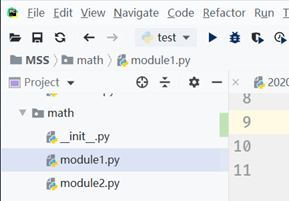

导入方法可归结为以下3种：   
	import 包名[.模块名[as别名]]   
	from 包名 import 模块名[as别名]   
	from 包名.模块名 import 成员名[as别名]    


In [ ]:
from .. import initializers  #从上一级目录中导入模块initializers
from .utils.generic_utils import Progbar #从当前目录下的子目录utils内的模块文件generic_utils中导入

## 10.8 应用实例

系统分成了5个包，它们的作用分别是：   
ui包：和用户进行交互的类，包括UserConsole类；   
util包：工具类，包括Constant和FileOperator类；   
exception包：自定义业务异常类，包括ConfigFileError类、OperateDatabaseError类和QueryDatabaseError类；   
logic包：业务逻辑类，包括CartItem类、Product类和Mall类；   
database包：数据库操作类，包括DatabaseOperator类和DatabaseAccess类；    


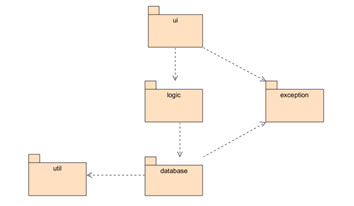

MSSApplication类的作为整个程序的入口点，用来启动本系统，该类不属于任何包。其代码如下：

In [ ]:
"""
家用电器销售系统启动类，整个系统的入口点
v1.8
"""
from ui.UserConsole import UserConsole


def main():
    UserConsole()


if __name__ == '__main__':
    main()

	UserConsole类的职责是和用户进行交互，相当于普通软件的界面。代码如下：

In [ ]:
from Exception.OperateDatabaseError import OperateDatabaseError
from Exception.QueryDatabaseError import QueryDatabaseError
from logic.Mall import Mall


class UserConsole:
    def __init__(self):

        self.mall = Mall()

        # 初始化系统
        self.ini_system()

        # 用户输入数据
        option = input('请选择您的操作：1-查看商品；2-购物；3-查看购物车；4-清空购物车；其它-结账')
        while option in ['1', '2', '3', '4']:
            if option == '1':
                self.output_products()
            elif option == '2':
                self.buy_product()
            elif option == '3':
                self.output_products_cart()
            else:
                self.clear_cart()
            option = input('操作成功！请选择您的操作：1-查看商品；2-购物；3-查看购物车；4-清空购物车；其它-结账')

        # 显示购买结果
        self.exit_system(self.mall.check_out())

    def ini_system(self):
        """
        初始化系统
        :return: 初始化的商品列表和购物车
        """
        print('欢迎使用家用电器销售系统！')

    def input_product_id(self):
        """
        用户输入商品编号
        :param products: 商品列表
        :return: 商品编号
        """
        product_id = input('请输入您要购买的产品编号：')
        try:
            while not self.mall.get_product_by_id(product_id):
                product_id = input('编号不存在，请重新输入要购买的产品编号：')
        except QueryDatabaseError as e:
            print(e)
        return product_id

    def input_product_count(self, product_id):
        """
        用户输入购买数量
        :param products: 商品列表
        :param product_id: 商品编号
        :return: 购买数量
        """
        count = int(input('请输入您要购买的产品数量：'))
        try:
            product = self.mall.get_product_by_id(product_id)
            while count > product.get_count():
                count = int(input('数量超出库存，请重新输入您要购买的产品数量：'))
        except QueryDatabaseError as e:
            print(e)
        return count

    def output_products(self):
        """
        显示商品信息
        :param products:商品列表
        :return: 无
        """
        print('产品和价格信息如下：')
        print('**************************************************')
        print('%-10s' % '编号', '%-10s' % '名称', '%-10s' % '品牌', '%-10s' % '价格', '%-10s' % '库存数量')
        print('-------------------------------------------------')
        try:
            for product in self.mall.get_all_products():
                print(product)
        except QueryDatabaseError as e:
            print(e)
        print('-------------------------------------------------')

    def output_products_cart(self):
        """
        显示购物车信息
        :param products_cart:购物车列表
        :return: 无
        """
        print('购物车信息如下：')
        print('***************************')
        print('%-10s' % '编号', '%-10s' % '购买数量')
        print('---------------------------')
        try:
            for cart_item in self.mall.get_all_products_in_cart():
                print('%-10s' % cart_item.get_id(), '%-6s' % cart_item.get_count())
        except QueryDatabaseError as e:
            print(e)
        print('---------------------------')

    def buy_product(self):
        """
        购买商品
        :param products: 商品列表
        :param products_cart: 购物车
        :return: None
        """
        product_id = self.input_product_id()
        count = self.input_product_count(product_id)
        if count > 0:
            try:
                self.mall.update_cart(product_id, count)
                self.mall.update_product(product_id, count)
            except OperateDatabaseError as e:
                print(e)

    def clear_cart(self):
        self.mall.clear_cart()

    def exit_system(self, amount):
        """
        退出系统
        :param amount:
        :return:
        """
        print('购买成功，您需要支付%8.2f元' % amount)
        print('谢谢您的光临，下次再见！')

	Constant类非常简单，系统中的常量都在此类中，代码如下：

In [ ]:
"""
系统基本信息类，可以通过此类进行一些基本信息的配置
"""


class Constant:
    FILE_NAME = "config.txt"  # 配置文件路径

FileOperator类负责进行文本文件的读写操作。代码如下：

In [ ]:
"""
文件操作类，提供基本的文件读写操作。
"""
from Exception.ConfigFileError import ConfigFileError
from util.Constant import Constant

debug = True


class FileOperator:
    @staticmethod
    def read_file():
        """
        读文件操作，将信息从文件中读出
        :return: 文件中的字符串
        """
        file = None
        try:
            file = open(Constant.FILE_NAME, "r+")
            info = file.readlines()
        except FileNotFoundError as e:
            raise ConfigFileError()
        else:
            return info
        finally:
            file.close()

    @staticmethod
    def write_file(info):
        """
        写文件操作，将字符串信息写入文件中，覆盖写入
        :param info: 字符串信息
        :return: 无
        """
        file = None
        try:
            file = open(Constant.FILE_NAME, "w+")
            file.write(info)
        except FileNotFoundError as e:
            raise e
        finally:
            file.close()


def test():
    pass


if __name__ == '__main__':
    test()

Mall代表商城本身，用户的实际业务操作是在这个类中完成的，代码如下：

In [ ]:
"""
商城实体类，提供重要业务操作。
"""
from database.DatabaseAccess import DatabaseAccess
from logic.CartItem import CartItem
from logic.Product import Product


class Mall:
    def __init__(self):
        self.database_access = DatabaseAccess()

    def get_all_products(self):
        """
        获取所有的商品项
        :return: 商品项
        """
        products = self.database_access.get_all_products()
        lst_product = []
        for row in products:
            product = Product(row[0], row[1], row[2], row[3], row[4])
            lst_product.append(product)
        return lst_product

    def get_all_products_in_cart(self):
        """
        获取所有购物车中的商品项
        :return: 购物车中的商品项
        """
        products = self.database_access.get_all_products_in_cart()
        lst_product = []
        for row in products:
            cart_item = CartItem(row[0], row[1])
            lst_product.append(cart_item)
        return lst_product

    def get_product_by_id(self, product_id):
        """
        根据商品编号获取数据库中商品
        :param product_id: 商品编号
        :return: 商品
        """
        product = self.database_access.get_product_by_id(product_id)
        if product:
            return Product(product[0], product[1], product[2], product[3], product[4])

    def update_cart(self, product_id, count):
        """
        更新购物车中的某项
        :param product_id:
        :param count:
        :return:
        """
        self.database_access.update_cart(product_id, count)

    def update_product(self, product_id, count):
        """
        更新商品表中的某个商品数量
        :param product_id: 商品编号
        :param count: 数量
        :return: None
        """
        self.database_access.update_product(product_id, count)

    def calculate_discount_amount(self, amount):
        """
        计算折扣后金额
        :param amount: 折扣前金额
        :return: 折扣后金额
        """
        if 5000 < amount <= 10000:
            amount = amount * 0.95
        elif 10000 < amount <= 20000:
            amount = amount * 0.90
        elif amount > 20000:
            amount = amount * 0.85
        else:
            amount = amount * 1
        return amount

    def get_products_amount(self):
        """
        计算所购商品金额
        :param products: 商品列表
        :param products_cart: 购物车
        :return: 购买金额
        """
        amount = 0
        products_cart = self.get_all_products_in_cart()
        for i in range(len(products_cart)):
            product = self.get_product_by_id(products_cart[i].get_id())
            price = product.get_price()
            count = products_cart[i].get_count()
            amount += price * count
        return amount

    def check_out(self):
        """
        计算折扣后金额
        :return: 折扣后金额
        """
        amount = self.get_products_amount()
        discount_amount = self.calculate_discount_amount(amount)
        return discount_amount

    def clear_cart(self):
        """
        清空购物车
        :return:None 
        """
        self.database_access.clear_cart()

CartItem类是一个实体类，代表购物车的商品，代码如下：

In [ ]:
"""
购物车商品类
"""

class CartItem:
    def __init__(self, id, count):
        self.__id = id
        self.__count = count

    def get_id(self):
        return self.__id

    def set_id(self, id):
        self.__id = id

    def get_count(self):
        return self.__count

    def set_count(self, count):
        self.__count = count

    def __str__(self):
        return "%-10s %10d" % (self.__id, self.__count)

Product类对应商城中的商品类，代码如下：

In [ ]:
"""
商品类
"""


class Product:
    def __init__(self, id, name, brand, price, count):
        self.__id = id
        self.__name = name
        self.__brand = brand
        self.__price = price
        self.__count = count

    def get_id(self):
        return self.__id

    def set_id(self, id):
        self.__id = id

    def get_name(self):
        return self.__name

    def set_name(self, name):
        self.__name = name

    def get_brand(self):
        return self.__brand

    def set_brand(self, brand):
        self.__brand = brand

    def get_price(self):
        return self.__price

    def set_price(self, price):
        self.__price = price

    def get_count(self):
        return self.__count

    def set_count(self, count):
        self.__count = count

    def __str__(self):
        return "%-10s %-10s %-10s %10.2f %10d" % (self.__id, self.__name, self.__brand, self.__price, self.__count)

ConfigFileError异常类，文件操作时出错则抛出此异常，代码如下：

In [ ]:
"""
文件操作异常类。
"""


class ConfigFileError(FileNotFoundError):
    def __str__(self):
        return '文件路径错误'

OperateDatabaseError类，在操作数据库进行增删改时抛出此类异常。代码如下：

In [ ]:
"""
操作数据库异常类。
"""
from pymysql import DatabaseError


class OperateDatabaseError(DatabaseError):
    def __str__(self):
        return '操作数据库失败'

QueryDatabaseError类，在操作数据库进行查询时抛出此类异常。代码如下：

In [ ]:
"""
查询数据库异常类。
"""
from pymysql import DatabaseError


class QueryDatabaseError(DatabaseError):
    def __str__(self):
        return '查询数据库失败'

DatabaseAccess，数据表访问类，进行数据表的各种操作。代码如下：

In [ ]:
"""
数据表访问类，提供对商品和购物车的增删改查操作。
"""
from database.DatabaseOperator import DatabaseOperator

class DatabaseAccess:
    def get_all_products(self):
        """
        获取所有的商品项
        :return: 商品项
        """
        return DatabaseOperator.select_command('select * from product')

    def get_all_products_in_cart(self):
        """
        获取所有购物车中的商品项
        :return: 购物车中的商品项
        """
        return DatabaseOperator.select_command('select * from cart')

    def get_product_by_id(self, product_id):
        """
        根据商品编号获取数据库中商品
        :param product_id: 商品编号
        :return: 商品
        """
        result = DatabaseOperator.select_command('select * from product where id = "' + product_id + '"')
        if len(result) > 0:
            return result[0]

    def update_cart(self, product_id, count):
        """
        更新购物车中的某项
        :param product_id:
        :param count:
        :return:
        """
        result = DatabaseOperator.select_command('select * from cart where id = "' + product_id + '"')
        if len(result) == 0:  # 不存在，则添加
            DatabaseOperator.execute_command('insert into cart values ("' + product_id + '",' + str(count) + ')')
        else:  # 存在，即更新此项
            count += result[0][1]
            DatabaseOperator.execute_command(
                'update cart set count = ' + str(count) + ' where id = "' + product_id + '"')

    def update_product(self, product_id, count):
        """
        更新商品表中的某个商品数量
        :param product_id: 商品编号
        :param count: 数量
        :return: None
        """
        DatabaseOperator.execute_command(
            'update product set count = ' + str(count) + ' where id = "' + product_id + '"')

    def clear_cart(self):
        """
        清空购物车
        :return: None
        """
        DatabaseOperator.execute_command('delete from cart')

QueryDatabaseError，数据库操作类，提供基本的数据库查询和操作。代码如下：

In [ ]:
"""
数据库操作类，提供基本的数据库查询和操作。
"""
import pymysql
from util.FileOperator import FileOperator
from pymysql import DatabaseError
from Exception.QueryDatabaseError import QueryDatabaseError
from Exception.OperateDatabaseError import OperateDatabaseError

class DatabaseOperator:
    @staticmethod
    def __open_database():
        """
        根据配置文件信息，打开数据库
        :return: 数据库对象
        """
        config_lst = FileOperator.read_file()

        # 打开数据库连接
        db = pymysql.connect(
            host=config_lst[0].strip('\n').split('=')[1],
            port=int(config_lst[1].strip('\n').split('=')[1]),  # port 必须是整型数据
            user=config_lst[2].strip('\n').split('=')[1],
            password=config_lst[3].strip('\n').split('=')[1],
            db=config_lst[4].strip('\n').split('=')[1],
            charset=config_lst[5].strip('\n').split('=')[1]
        )
        return db

    @staticmethod
    def select_command(str_sql):
        """
        数据库查询操作
        :param str_sql: sql语句
        :return: 查询结果列表
        """
        db = DatabaseOperator.__open_database()
        cursor = db.cursor()
        try:
            cursor.execute(str_sql)
            return cursor.fetchall()
        except DatabaseError:
            raise QueryDatabaseError()
        finally:
            cursor.close()
            db.close()

    @staticmethod
    def execute_command(str_sql):
        """
        数据库执行操作，包括增删改
        :param str_sql: sql语句
        :return: None
        """
        db = DatabaseOperator.__open_database()
        cursor = db.cursor()
        try:
            cursor.execute(str_sql)
            db.commit()
        except DatabaseError:
            # 发生错误时回滚
            db.rollback()
            raise OperateDatabaseError()
        finally:
            cursor.close()
            db.close()

从上面的代码来看，虽然功能日渐增加，系统变得越来越复杂。因此，需要使用包来管理各个类文件，并合理安排依赖关系，这样以后有改动时，尽可能地减少对其它类的影响。上面的有些类看起来很简单，似乎没什么必要，实际上有它存在的道理，希望大家认真体会。

## 本章小结

本章重点介绍了Python模块和包的重要知识点，讨论了什么是模块，模块和库的区别，介绍了如何导入一个模块，以及怎么定义自己的模块。接着，还介绍了查看模块的一些函数和属性。最后简单介绍了包的概念，了解了怎么定义一个包，和如何导入包。